# Marketing Budget Allocation

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

**Group Members:**
- Sian 
- Milind Bhatia (mb67324)
- Abhijit Anil (aa94375)
- Sharan
- Vi

**Problem Description**

Marketing budgets now comprise 11 percent of total company budgets, based on a CMO survey sponsored by the Fuqua School of Business at Duke University, Deloitte LLP, and the American Marketing Association. However, the effectiveness of marketing varies significantly: on the one hand, P&G cut more than $100 million in digital marketing spending because their digital ads were largely ineffective; on the other hand, Netflix plans a 54% boost in ad spending because they got very positive feedback in international markets.
One potential reason for such variation is the way of making marketing budget allocations. Namely, how much to invest in each advertisement platform. As stated in the Handbook of Marketing Analytics:

*...budget decisions are often based on gut feelings or on the negotiation skills of individual managers. Consequently, politics and individual opinions tend to shape the decision process instead of fact-based discussions. Obviously, these rules and practices bear the risk of results far away from the optimal, profit-maximizing budget.*

Indeed, the marketing strategy of Netflix seems to be steered by data.
In this project, we use linear programming to build a simple marketing budget allocation strategy.

</font>
</div>

In [1]:
import numpy as np
import pandas as pd
import gurobipy as gp
import matplotlib.pyplot as plt



<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

**1.** Assume that your company is deciding how to spend a marketing budget of $10M. You work in the marketing department as a data scientist and the chief marketing officer has asked you write a report recommending how to spread this budget among several marketing mediums. Your department has employed an outside consulting firm to estimate the return on investment (ROI) of each marketing medium under consideration.

</font>
</div>

In [21]:
# Read the csv file to get the ROI data from different firms
roi_df = pd.read_csv('ROI_data.csv')
roi_df = roi_df.set_index('Platform')

In [22]:
roi_df

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [23]:
# we will only need first_est for now
channels = list(roi_df.columns)
roi_1 = list(roi_df.loc['ROI'].values)
roi_2 = list(roi_df.loc['Second Firms ROI Estimate'].values)
print('First set of ROIs')
print(roi_1)
print('\nSecond set of ROIs')
print(roi_2)

First set of ROIs
[0.031, 0.049, 0.024, 0.039, 0.016, 0.024, 0.046, 0.026, 0.033, 0.044]

Second set of ROIs
[0.049, 0.023, 0.024, 0.039, 0.044, 0.046, 0.026, 0.019, 0.037, 0.026]



<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

**2.** On top of these ROIs, your boss has decided to constrain your budget as follows:

a. The amount invested in print and TV should be no more than the amount spent on Facebook and Email. Surprisingly, email seems to be a great channel for reaching real people.

b. The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and Twitter) should be at least twice of SEO and AdWords.

c. For each platform, the amount invested should be no more than $3M.

</font>
</div>

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

Assume that $x_0$ to $x_9$ to be the amount invested in different platforms

Constraint a:
$$(x_0 + x_1) - (x_4 + x_9) <= 0 $$

Constraint b:
$$(x_4 + x_5 + x_6 + x_7 + x_8) - 2*(x_2 + x_3) >= 0$$

Constraint c:
$$x_i <= 3$$
$$ \ i \in [0, 9]$$

Sum and Non-zero Constraint:
$$\Sigma x_i <= 10$$
$$ \ i \in [0, 9]$$


</font>
</div>

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

Now we are trying to maximize the ROI of each platform as:
$$ z = \Sigma  (x_i * ROI_i)$$
$$ \ i \in [0, 9]$$


</font>
</div>

3. Formulate the marketing budget allocation problem as a linear program. Use gurobi to find the optimal budget allocation.

In [26]:
channels

['Print',
 'TV',
 'SEO',
 'AdWords',
 'Facebook',
 'LinkedIn',
 'Instagram',
 'Snapchat',
 'Twitter',
 'Email']

In [27]:
m_budget = 10

mod=gp.Model()

# Define variables x0 to x9
modx = mod.addMVar(len(channels),name=channels)

# Set Objective Function
mod.setObjective(gp.quicksum(modx[i]*roi_1[i] for i in range(len(channels))),sense=gp.GRB.MAXIMIZE)

# Define 3 constraints
conlist=[0]*4
conlist[0] = mod.addConstr(modx[channels.index('Print')]+modx[channels.index('TV')] <= modx[channels.index('Facebook')]+modx[channels.index('Email')])
conlist[1] = mod.addConstr(modx[channels.index('Facebook')]+modx[channels.index('LinkedIn')]+modx[channels.index('Instagram')]+modx[channels.index('Snapchat')]+modx[channels.index('Twitter')] >= 2*(modx[channels.index('SEO')]+modx[channels.index('AdWords')]))
conlist[2] = mod.addConstr(gp.quicksum(modx[i] for i in range(len(channels))) <= m_budget)
conlist[3] = mod.addConstrs((modx[i] <=3) for i in range(len(channels)))

# Optimize
mod.Params.OutputFlag = 0
mod.optimize()

In [28]:
print('Based on the first set of ROIs:\n')
for i in range(len(roi_1)):
  print(f'Investment in {channels[i]} should be ${round(modx.x[i],2)}M')

Based on the first set of ROIs:

Investment in Print should be $0.0M
Investment in TV should be $3.0M
Investment in SEO should be $0.0M
Investment in AdWords should be $1.0M
Investment in Facebook should be $0.0M
Investment in LinkedIn should be $0.0M
Investment in Instagram should be $3.0M
Investment in Snapchat should be $0.0M
Investment in Twitter should be $0.0M
Investment in Email should be $3.0M


In [29]:
print(f'Total marketing return from the optimized allocation is ${mod.ObjVal:.3f}M')

Total marketing return from the optimized allocation is $0.456M


<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

4. Your boss is happy to see the promising results presented by the marketing department. However, your boss is also very concerned because your boss recalls being somewhat disappointed after following such recommendations in the past. To be cautious about the decision, your team has decided to get another opinion about the ROI data and rerun the analysis. The second consulting firm returns the estimates of the ROI data in the table below (also in the CSV file mentioned above). You are asked to compare the two optimal allocations from these two ROI estimates.


</font>
</div>

In [30]:
m_budget = 10

# Use roi_2 as the vector
mod2=gp.Model()

# Define variables x0 to x9
mod2x = mod2.addMVar(len(channels),name=channels)

# Set Objective Function
mod2.setObjective(gp.quicksum(mod2x[i]*roi_2[i] for i in range(len(channels))),sense=gp.GRB.MAXIMIZE)

# Define 3 constraints
conlist2=[0]*4
conlist2[0] = mod2.addConstr(mod2x[channels.index('Print')]+mod2x[channels.index('TV')] <= mod2x[channels.index('Facebook')]+mod2x[channels.index('Email')])
conlist2[1] = mod2.addConstr(mod2x[channels.index('Facebook')]+mod2x[channels.index('LinkedIn')]+mod2x[channels.index('Instagram')]+mod2x[channels.index('Snapchat')]+mod2x[channels.index('Twitter')] >= 2*(mod2x[channels.index('SEO')]+mod2x[channels.index('AdWords')]))
conlist2[2] = mod2.addConstr(gp.quicksum(mod2x[i] for i in range(len(channels))) <= m_budget)
conlist2[3] = mod2.addConstrs((mod2x[i] <=3) for i in range(len(channels)))

# Optimize
mod2.Params.OutputFlag = 0
mod2.optimize()

In [31]:
print('Based on the ROI opinion from the second firm:\n')
for i in range(len(roi_2)):
  print(f'Investment in {channels[i]} should be ${round(mod2x.x[i],2)}M')

Based on the ROI opinion from the second firm:

Investment in Print should be $3.0M
Investment in TV should be $0.0M
Investment in SEO should be $0.0M
Investment in AdWords should be $1.0M
Investment in Facebook should be $3.0M
Investment in LinkedIn should be $3.0M
Investment in Instagram should be $0.0M
Investment in Snapchat should be $0.0M
Investment in Twitter should be $0.0M
Investment in Email should be $0.0M


In [32]:
print(f'Total marketing return from the second optimized allocation is ${mod2.ObjVal:.3f}M')

Total marketing return from the second optimized allocation is $0.456M


<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

5. Are the allocations the same? **Allocations are not the same.** 
  
   Assuming the first ROI data is correct, if you were to use the second allocation (the allocation that assumed the second ROI data was correct) how much lower would the objective be relative to the optimal objective (the one that uses the first ROI data and the first allocation)? \
   **Objective would decrease by 204,000.** 



</font>
</div>

In [33]:
# Assuming the  first ROI data is correct, if we use the second allocation numbers
obj_1_allo_2 = 0
for i in range(len(channels)):
    obj_1_allo_2 = obj_1_allo_2 + ( mod2x.x[i] * roi_1[i] )

diff = mod.Objval -  obj_1_allo_2
print('Objective value decreases by: $',round(diff*1000000,2))

Objective value decreases by: $ 204000.0


<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

   Assuming the second ROI data is correct, if you used the first allocation how much lower would the objective be relative to the optimal objective? Do you think the third constraint above, based on your boss’ experience, is useful? \
   **Objective is lower by 192,000.**

   </font>
</div>

In [34]:
# Assuming the  second ROI data is correct, if we use the first allocation numbers
obj_2_allo_1 = 0
for i in range(len(channels)):
    obj_2_allo_1 = obj_2_allo_1 + ( modx.x[i] * roi_2[i] )

diff_2 = mod2.Objval -  obj_2_allo_1
print('Objective value decreases by: $', round(diff_2*1000000,2))

Objective value decreases by: $ 192000.0


<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 
   
   Do you think the third constraint above, based on your boss’ experience, is useful?

   </font>
</div>

In [35]:
#to check if third constraint based on the boss' experience is useful, we will calculate the shadow price
shadow_prices1 = []
shadow_prices1 = [conlist[3][i].Pi for i in range(len(channels))]
print("For First ROI Model:")
for i in range(len(channels)):
    if shadow_prices1[i] != 0:
        print(shadow_prices1[i], 'is not 0, hence it is binding')
    else:
        print(shadow_prices1[i], 'is  0, hence it is non binding')


For First ROI Model:
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding
0.006999999999999999 is not 0, hence it is binding
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding
0.015 is not 0, hence it is binding


In [36]:
#to check if third constraint based on the boss' experience is useful, we will calculate the shadow price
shadow_prices2 = []
shadow_prices2 = [conlist2[3][i].Pi for i in range(len(channels))]
print("For Second ROI Model:")
for i in range(len(channels)):
    if shadow_prices2[i] != 0:
        print(shadow_prices2[i], 'is not 0, hence it is binding')
    else:
        print(shadow_prices2[i], 'is  0, hence it is non binding')

For Second ROI Model:
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding
0.015 is not 0, hence it is binding
0.006999999999999999 is not 0, hence it is binding
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding
0.0 is  0, hence it is non binding


<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

   By calculating the shadow prices for each platform, we can see that in both cases we have 2 binding constraints. This implies that if we change the these contraints, it will impact the objective function. Hence, we can say that this means that the boss' experience has come in handy such that we should take into consideration the constraint he has imposed.

   To check this further, we shall remove the 3rd constraint for both ROIs and see how our allocations change.

   </font>
</div>

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

We will remove the third constraint and check if this makes an impact on our objective function:


</font>
</div>

In [37]:
m_budget = 10

mod=gp.Model()

# Define variables x0 to x9
modx = mod.addMVar(len(channels),name=channels)

# Set Objective Function
mod.setObjective(gp.quicksum(modx[i]*roi_1[i] for i in range(len(channels))),sense=gp.GRB.MAXIMIZE)

# Define 3 constraints
conlist=[0]*4
conlist[0] = mod.addConstr(modx[channels.index('Print')]+modx[channels.index('TV')] <= modx[channels.index('Facebook')]+modx[channels.index('Email')])
conlist[1] = mod.addConstr(modx[channels.index('Facebook')]+modx[channels.index('LinkedIn')]+modx[channels.index('Instagram')]+modx[channels.index('Snapchat')]+modx[channels.index('Twitter')] >= 2*(modx[channels.index('SEO')]+modx[channels.index('AdWords')]))
conlist[2] = mod.addConstr(gp.quicksum(modx[i] for i in range(len(channels))) <= m_budget)

# Optimize
mod.Params.OutputFlag = 0
mod.optimize()

In [38]:
print('Based on the first set of ROIs:\n')
for i in range(len(channels)):
  print(f'Investment in {channels[i]} should be ${round(modx.x[i],2)}M')

Based on the first set of ROIs:

Investment in Print should be $0.0M
Investment in TV should be $5.0M
Investment in SEO should be $0.0M
Investment in AdWords should be $0.0M
Investment in Facebook should be $0.0M
Investment in LinkedIn should be $0.0M
Investment in Instagram should be $0.0M
Investment in Snapchat should be $0.0M
Investment in Twitter should be $0.0M
Investment in Email should be $5.0M


In [39]:
print('Objective value: $', round(mod.Objval,4))

Objective value: $ 0.465


In [40]:
m_budget = 10

# Use roi_2 as the vector
mod2=gp.Model()

# Define variables x0 to x9
mod2x = mod2.addMVar(len(channels),name=channels)

# Set Objective Function
mod2.setObjective(gp.quicksum(mod2x[i]*roi_2[i] for i in range(len(channels))),sense=gp.GRB.MAXIMIZE)

# Define 3 constraints
conlist2=[0]*4
conlist2[0] = mod2.addConstr(mod2x[channels.index('Print')]+mod2x[channels.index('TV')] <= mod2x[channels.index('Facebook')]+mod2x[channels.index('Email')])
conlist2[1] = mod2.addConstr(mod2x[channels.index('Facebook')]+mod2x[channels.index('LinkedIn')]+mod2x[channels.index('Instagram')]+mod2x[channels.index('Snapchat')]+mod2x[channels.index('Twitter')] >= 2*(mod2x[channels.index('SEO')]+mod2x[channels.index('AdWords')]))
conlist2[2] = mod2.addConstr(gp.quicksum(mod2x[i] for i in range(len(channels))) <= m_budget)

# Optimize
mod2.Params.OutputFlag = 0
mod2.optimize()

In [41]:
print('Based on the ROI opinion from the second firm:\n')
for i in range(len(channels)):
  print(f'Investment in {channels[i]} should be ${round(mod2x.x[i],2)}M')

Based on the ROI opinion from the second firm:

Investment in Print should be $5.0M
Investment in TV should be $0.0M
Investment in SEO should be $0.0M
Investment in AdWords should be $0.0M
Investment in Facebook should be $5.0M
Investment in LinkedIn should be $0.0M
Investment in Instagram should be $0.0M
Investment in Snapchat should be $0.0M
Investment in Twitter should be $0.0M
Investment in Email should be $0.0M


In [42]:
print('Objective value: $', round(mod2.Objval,4))

Objective value: $ 0.465



<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

**Both models' allocations and objective value change as we remove the third constraint, therefore we can confirm that the boss' experience is useful.**

</font>
</div>




<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

*Caution: Need to redo the first model and then run the results below. (It's because we removed thr 3rd constraint before for evaluation)*

</font>
</div>

In [43]:
# Redo the first set of model
m_budget = 10

mod=gp.Model()

# Define variables x0 to x9
modx = mod.addMVar(len(channels),name=channels)

# Set Objective Function
mod.setObjective(gp.quicksum(modx[i]*roi_1[i] for i in range(len(channels))),sense=gp.GRB.MAXIMIZE)

# Define 3 constraints
conlist=[0]*4
conlist[0] = mod.addConstr(modx[channels.index('Print')]+modx[channels.index('TV')] <= modx[channels.index('Facebook')]+modx[channels.index('Email')])
conlist[1] = mod.addConstr(modx[channels.index('Facebook')]+modx[channels.index('LinkedIn')]+modx[channels.index('Instagram')]+modx[channels.index('Snapchat')]+modx[channels.index('Twitter')] >= 2*(modx[channels.index('SEO')]+modx[channels.index('AdWords')]))
conlist[2] = mod.addConstr(gp.quicksum(modx[i] for i in range(len(channels))) <= m_budget)
conlist[3] = mod.addConstrs((modx[i] <=3) for i in range(len(channels)))

# Optimize
mod.Params.OutputFlag = 0
mod.optimize()

# redo mod2
m_budget = 10

# Use roi_2 as the vector
mod2=gp.Model()

# Define variables x0 to x9
mod2x = mod2.addMVar(len(channels),name=channels)

# Set Objective Function
mod2.setObjective(gp.quicksum(mod2x[i]*roi_2[i] for i in range(len(channels))),sense=gp.GRB.MAXIMIZE)

# Define 3 constraints
conlist2=[0]*4
conlist2[0] = mod2.addConstr(mod2x[channels.index('Print')]+mod2x[channels.index('TV')] <= mod2x[channels.index('Facebook')]+mod2x[channels.index('Email')])
conlist2[1] = mod2.addConstr(mod2x[channels.index('Facebook')]+mod2x[channels.index('LinkedIn')]+mod2x[channels.index('Instagram')]+mod2x[channels.index('Snapchat')]+mod2x[channels.index('Twitter')] >= 2*(mod2x[channels.index('SEO')]+mod2x[channels.index('AdWords')]))
conlist2[2] = mod2.addConstr(gp.quicksum(mod2x[i] for i in range(len(channels))) <= m_budget)
conlist2[3] = mod2.addConstrs((mod2x[i] <=3) for i in range(len(channels)))

# Optimize
mod2.Params.OutputFlag = 0
mod2.optimize()

In [44]:
# Create a dictionary from the arrays
data = {'Platform': channels,'ROI_First': modx.x, 'ROI_Second': mod2x.x}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
df

,Platform,ROI_First,ROI_Second
0,Print,0.0,3.0
1,TV,3.0,0.0
2,SEO,0.0,0.0
3,AdWords,1.0,1.0
4,Facebook,0.0,3.0
5,LinkedIn,0.0,3.0
6,Instagram,3.0,0.0
7,Snapchat,0.0,0.0
8,Twitter,0.0,0.0
9,Email,3.0,0.0


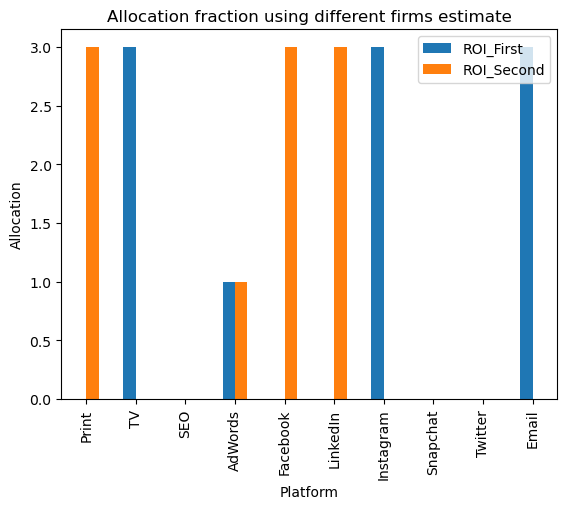

In [45]:
# Plot the dataframe to make comparison
df.plot(x='Platform', y=['ROI_First', 'ROI_Second'], kind='bar')
plt.xlabel('Platform')
plt.ylabel('Allocation')
plt.title('Allocation fraction using different firms estimate')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

6. To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data. Use the first ROI data as your starting point. By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?

</font>
</div>

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

**How to perform sensitivity analysis:**

- ROI will be changed for each platform one by one without changing it for the other platforms
- Optimal Allocation and Objective value will be recorded to identify whether it stays the same

</font>
</div>

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 
For the first ROI model:

</font>
</div>

In [46]:
# Redo the first set of model
m_budget = 10

mod=gp.Model()

# Define variables x0 to x9
modx = mod.addMVar(len(channels),name=channels)

# Set Objective Function
mod.setObjective(gp.quicksum(modx[i]*roi_1[i] for i in range(len(channels))),sense=gp.GRB.MAXIMIZE)

# Define 3 constraints
conlist=[0]*4
conlist[0] = mod.addConstr(modx[channels.index('Print')]+modx[channels.index('TV')] <= modx[channels.index('Facebook')]+modx[channels.index('Email')])
conlist[1] = mod.addConstr(modx[channels.index('Facebook')]+modx[channels.index('LinkedIn')]+modx[channels.index('Instagram')]+modx[channels.index('Snapchat')]+modx[channels.index('Twitter')] >= 2*(modx[channels.index('SEO')]+modx[channels.index('AdWords')]))
conlist[2] = mod.addConstr(gp.quicksum(modx[i] for i in range(len(channels))) <= m_budget)
conlist[3] = mod.addConstrs((modx[i] <=3) for i in range(len(channels)))

# Optimize
mod.Params.OutputFlag = 0
mod.optimize()

In [47]:
modx.SAObjLow

array([ -inf, 0.039,  -inf, 0.033,  -inf,  -inf, 0.039,  -inf,  -inf,
       0.029])

In [48]:
modx.SAObjUp

array([0.049, 0.062, 0.039, 0.046, 0.029, 0.039,   inf, 0.039, 0.039,
         inf])

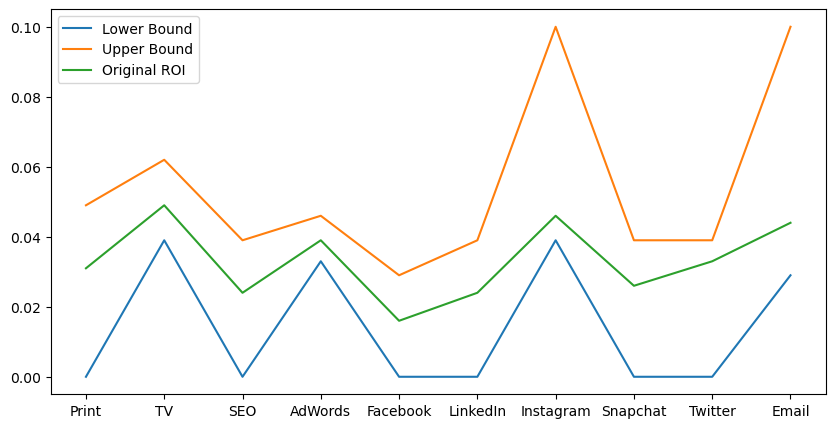

In [49]:
# Plot the lower bound and upper bound
l1 = [0 if (x==-np.inf) else x for x in modx.SAObjLow]
l2 = [0.1 if (x==np.inf) else x for x in modx.SAObjUp]

plt.figure(figsize=(10,5))
plt.plot(channels, l1,label='Lower Bound')
plt.plot(channels, l2,label='Upper Bound')
plt.plot(channels, roi_1,label='Original ROI')
plt.legend()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 
For the second ROI model:

</font>
</div>

In [50]:
# redo mod2
m_budget = 10

# Use roi_2 as the vector
mod2=gp.Model()

# Define variables x0 to x9
mod2x = mod2.addMVar(len(channels),name=channels)

# Set Objective Function
mod2.setObjective(gp.quicksum(mod2x[i]*roi_2[i] for i in range(len(channels))),sense=gp.GRB.MAXIMIZE)

# Define 3 constraints
conlist2=[0]*4
conlist2[0] = mod2.addConstr(mod2x[channels.index('Print')]+mod2x[channels.index('TV')] <= mod2x[channels.index('Facebook')]+mod2x[channels.index('Email')])
conlist2[1] = mod2.addConstr(mod2x[channels.index('Facebook')]+mod2x[channels.index('LinkedIn')]+mod2x[channels.index('Instagram')]+mod2x[channels.index('Snapchat')]+mod2x[channels.index('Twitter')] >= 2*(mod2x[channels.index('SEO')]+mod2x[channels.index('AdWords')]))
conlist2[2] = mod2.addConstr(gp.quicksum(mod2x[i] for i in range(len(channels))) <= m_budget)
conlist2[3] = mod2.addConstrs((mod2x[i] <=3) for i in range(len(channels)))

# Optimize
mod2.Params.OutputFlag = 0
mod2.optimize()

In [51]:
mod2x.SAObjLow

array([0.039 ,   -inf,   -inf, 0.0375, 0.029 , 0.039 ,   -inf,   -inf,
         -inf,   -inf])

In [52]:
mod2x.SAObjUp

array([0.052, 0.049, 0.039, 0.046,   inf,   inf, 0.039, 0.039, 0.039,
       0.029])

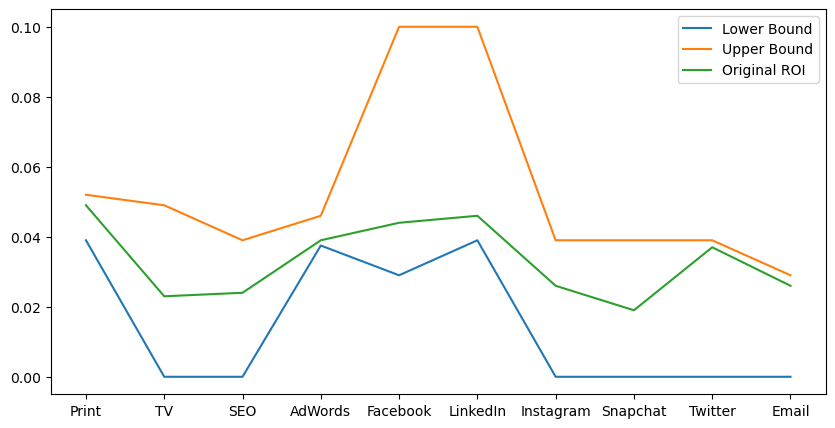

In [53]:
# Plot the lower bound and upper bound
l1 = [0 if (x==-np.inf) else x for x in mod2x.SAObjLow]
l2 = [0.1 if (x==np.inf) else x for x in mod2x.SAObjUp]

plt.figure(figsize=(10,5))
plt.plot(channels, l1,label='Lower Bound')
plt.plot(channels, l2,label='Upper Bound')
plt.plot(channels, roi_2,label='Original ROI')
plt.legend()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

7. Your boss has gained permission to reinvest half of the return. For example, if the marketing obtains a 4% return in January, the budget of February will be 10M + 10 × 4% × 50% = $10.2M. The monthly ROI for next year is given in an attached csv file. The three constraints given by your boss are still in place for each month. What is the optimal allocation for each month?

</font>
</div>

In [55]:
# Read the csv file and convert the number to percentage value
roi_det_df = pd.read_csv('roi_mat.csv')
roi_det_df

,Unnamed: 0,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
5,June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
6,July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
7,August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
8,September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
9,October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


In [60]:
months = roi_det_df.iloc[:,0].tolist()
reinvested_amount = 0
m_budget = 10
month_allocation = {}
counter = 0
for m in months:
    MarkMonthMod=gp.Model()
    MarkMonthModX = MarkMonthMod.addMVar(len(channels),name=channels)
    MarkMonthMod.setObjective(gp.quicksum((roi_det_df.iloc[counter][i+1]/100)*MarkMonthModX[i] for i in range(len(channels))),sense=gp.GRB.MAXIMIZE)
    consls=[0]*3
    consls[0] = MarkMonthMod.addConstr(MarkMonthModX[channels.index('Print')]+MarkMonthModX[channels.index('TV')] <= MarkMonthModX[channels.index('Facebook')]+MarkMonthModX[channels.index('Email')])
    consls[1] = MarkMonthMod.addConstr(MarkMonthModX[channels.index('Facebook')]+MarkMonthModX[channels.index('LinkedIn')]+MarkMonthModX[channels.index('Instagram')]+MarkMonthModX[channels.index('Snapchat')]+MarkMonthModX[channels.index('Twitter')] >= 2*(MarkMonthModX[channels.index('SEO')]+MarkMonthModX[channels.index('AdWords')]))
    consls[2] = MarkMonthMod.addConstr(gp.quicksum(MarkMonthModX[i]for i in range(len(channels))) <= (m_budget + reinvested_amount)) 
    varimonth = MarkMonthMod.addConstrs((MarkMonthModX[i] <=3) for i in range(len(channels)))
    MarkMonthMod.Params.OutputFlag = 0
    MarkMonthMod.optimize()
    curr_obj = MarkMonthMod.objVal
    print(curr_obj)
    month_allocation[m] = list(MarkMonthModX.x)
    reinvested_amount = reinvested_amount + 0.5 * curr_obj
    counter +=1

df_all = pd.DataFrame(month_allocation)

df_all = df_all.rename(index=dict(zip(df_all.index, channels)))
df_all

0.373
0.40629600000000005
0.414416976
0.414486833568
0.43214349666744
0.45476652281847335
0.4686546416665513
0.4879661131005957
0.4592199484466449
0.4275752085162833
0.5173755681180985
0.5168341742146887


,January,February,March,April,May,June,July,August,September,October,November,December
Print,3.000000,3.0000,0.000000,0.000000,1.8041,3.000000,1.123777,3.000000,1.362933,0.000000,3.000000,3.000000
TV,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
SEO,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AdWords,1.333333,2.3955,3.000000,3.000000,0.0000,0.000000,3.000000,1.827294,3.000000,3.000000,2.056421,0.427951
Facebook,0.000000,3.0000,0.000000,0.000000,0.0000,0.000000,1.123777,0.000000,0.000000,0.000000,0.000000,3.000000
LinkedIn,0.000000,0.0000,3.000000,3.000000,0.0000,0.000000,0.000000,0.654588,3.000000,3.000000,1.112842,0.000000
Instagram,2.666667,0.0000,1.389648,3.000000,3.0000,3.000000,3.000000,0.000000,0.000000,3.000000,3.000000,0.000000
Snapchat,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Twitter,0.000000,1.7910,3.000000,1.596856,3.0000,2.020172,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000
Email,3.000000,0.0000,0.000000,0.000000,3.0000,3.000000,0.000000,3.000000,1.362933,2.955475,3.000000,3.000000


In [61]:
result_df = pd.DataFrame()
for i in range(df_all.shape[1] - 1):
    column_name = df_all.columns[i]
    next_column_name = df_all.columns[i + 1]
    result_column_name = f'{column_name} - {next_column_name}'
    result_df[result_column_name] = df_all[next_column_name] - df_all[column_name]


In [62]:
result_df

,January - February,February - March,March - April,April - May,May - June,June - July,July - August,August - September,September - October,October - November,November - December
Print,0.000000,-3.000000,0.000000,1.804100,1.195900,-1.876223,1.876223,-1.637067,-1.362933,3.000000,0.000000
TV,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
SEO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AdWords,1.062167,0.604500,0.000000,-3.000000,0.000000,3.000000,-1.172706,1.172706,0.000000,-0.943579,-1.628470
Facebook,3.000000,-3.000000,0.000000,0.000000,0.000000,1.123777,-1.123777,0.000000,0.000000,0.000000,3.000000
LinkedIn,0.000000,3.000000,0.000000,-3.000000,0.000000,0.000000,0.654588,2.345412,0.000000,-1.887158,-1.112842
Instagram,-2.666667,1.389648,1.610352,0.000000,0.000000,0.000000,-3.000000,0.000000,3.000000,0.000000,-3.000000
Snapchat,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Twitter,1.791000,1.209000,-1.403144,1.403144,-0.979828,0.979828,0.000000,0.000000,-3.000000,0.000000,0.000000
Email,-3.000000,0.000000,0.000000,3.000000,0.000000,-3.000000,3.000000,-1.637067,1.592543,0.044525,0.000000


<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

8. A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not need to solve a new optimization model. Describe how my might model this?

</font>
</div>

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

The allocations above are not stable. To address this issue, we can add a stability constraint. We can store the current montly allocation for each platform in a list and add a constraint for the next iteration such that the next optimized value of allocation minus the current one will be lesser than or equal to 1. 

This should help us in making sure we have a stable budget allocation.

</font>
</div>